# Introduction

This project uses datasets from the WPRDC to determine the best neighborhood in Pittsburgh. Our metric to determine "best" is the most family friendly. This is determined by looking at the number of playgrounds, number of arrest, and number of city facilities. In order to come up with this metric, we each independently chose a dataset to use and found something in common between them to use as our overarching metric. We did not explore any alternatives.

# Metrics

We are ranking neighborhoods by "family friendliness", which is a combination of our three submetrics: police arrests, playground equipment, and number of facilities. Neighborhoods were categorized into four categories: 1-poor, 2-average, 3-good, and 4-excellent in our orginal datasets and the final metric categories are as follows where "x" is the combined score of the neighborhood: x<6-poor, 5<x<8-average, 7<x<10-good, 9<x<13excellent . The corresponding datasets for our metrics are "Pittsburgh Police Arrests Data", "Pittsburgh Playground Equipment", and "City of Pittsburgh Facilities".
<br>
<br>
Best neighborhood for playgrounds: Squirrel Hill South <br>
Best neighborhood for arrests: Mt. Oliver <br>
Best neighborhood for city facilities: /Highland Park/ Highland Park contains landmarks like the Pittsburgh Zoo, Highland Park, King Estate Park, and other recreation sites like playgrounds and a bicycle track. Additionally, it contains a large amount of service and training facilities operated by the City of Pittsburgh. <br>

# Determining the Best Neighborhood

In [4]:
import pandas as pd
fac = pd.read_csv("facility_scores.csv", index_col="Neighborhood")
arr = pd.read_csv("arrest_data.csv", index_col="Neighborhood")
play = pd.read_csv("playground_point_data.csv", index_col="Neighborhood")

output = pd.merge(fac,arr,
                 on='Neighborhood',
                 how='inner')
output

output2 = pd.merge(output,play,
                  on='Neighborhood',
                  how='inner')
output2


output3 = output2.drop(['facility count', 'Arrests', 'num_playgrounds', 'categorization'], axis=1)

output3

,Points,Arrests_Score,score_playgrounds
Neighborhood,,,
Highland Park,4,3,2
Squirrel Hill South,4,2,4
Perry North,3,2,2
Brookline,3,1,2
Strip District,2,3,1
...,...,...,...
Larimer,1,2,1
Point Breeze North,1,3,1
Crafton Heights,1,3,2


In [5]:
output3['Total Score'] = output3.sum(axis=1)

output3

output3.sort_values('Total Score', ascending=False)

,Points,Arrests_Score,score_playgrounds,Total Score
Neighborhood,,,,
Squirrel Hill South,4,2,4,10
Highland Park,4,3,2,9
Morningside,1,4,2,7
Swisshelm Park,1,4,2,7
Upper Lawrenceville,1,4,2,7
...,...,...,...,...
Marshall-Shadeland,1,1,2,4
Middle Hill,1,2,1,4
Homewood North,1,1,1,3


In [6]:
# How close to all 4s are the best neighborhoods?
output3['Average Score'] = output3[['Points', 'Arrests_Score', 'score_playgrounds']].mean(axis=1)
output3
output3.sort_values('Average Score', ascending=False)

,Points,Arrests_Score,score_playgrounds,Total Score,Average Score
Neighborhood,,,,,
Squirrel Hill South,4,2,4,10,3.333333
Highland Park,4,3,2,9,3.000000
Morningside,1,4,2,7,2.333333
Swisshelm Park,1,4,2,7,2.333333
Upper Lawrenceville,1,4,2,7,2.333333
...,...,...,...,...,...
Marshall-Shadeland,1,1,2,4,1.333333
Middle Hill,1,2,1,4,1.333333
Homewood North,1,1,1,3,1.000000


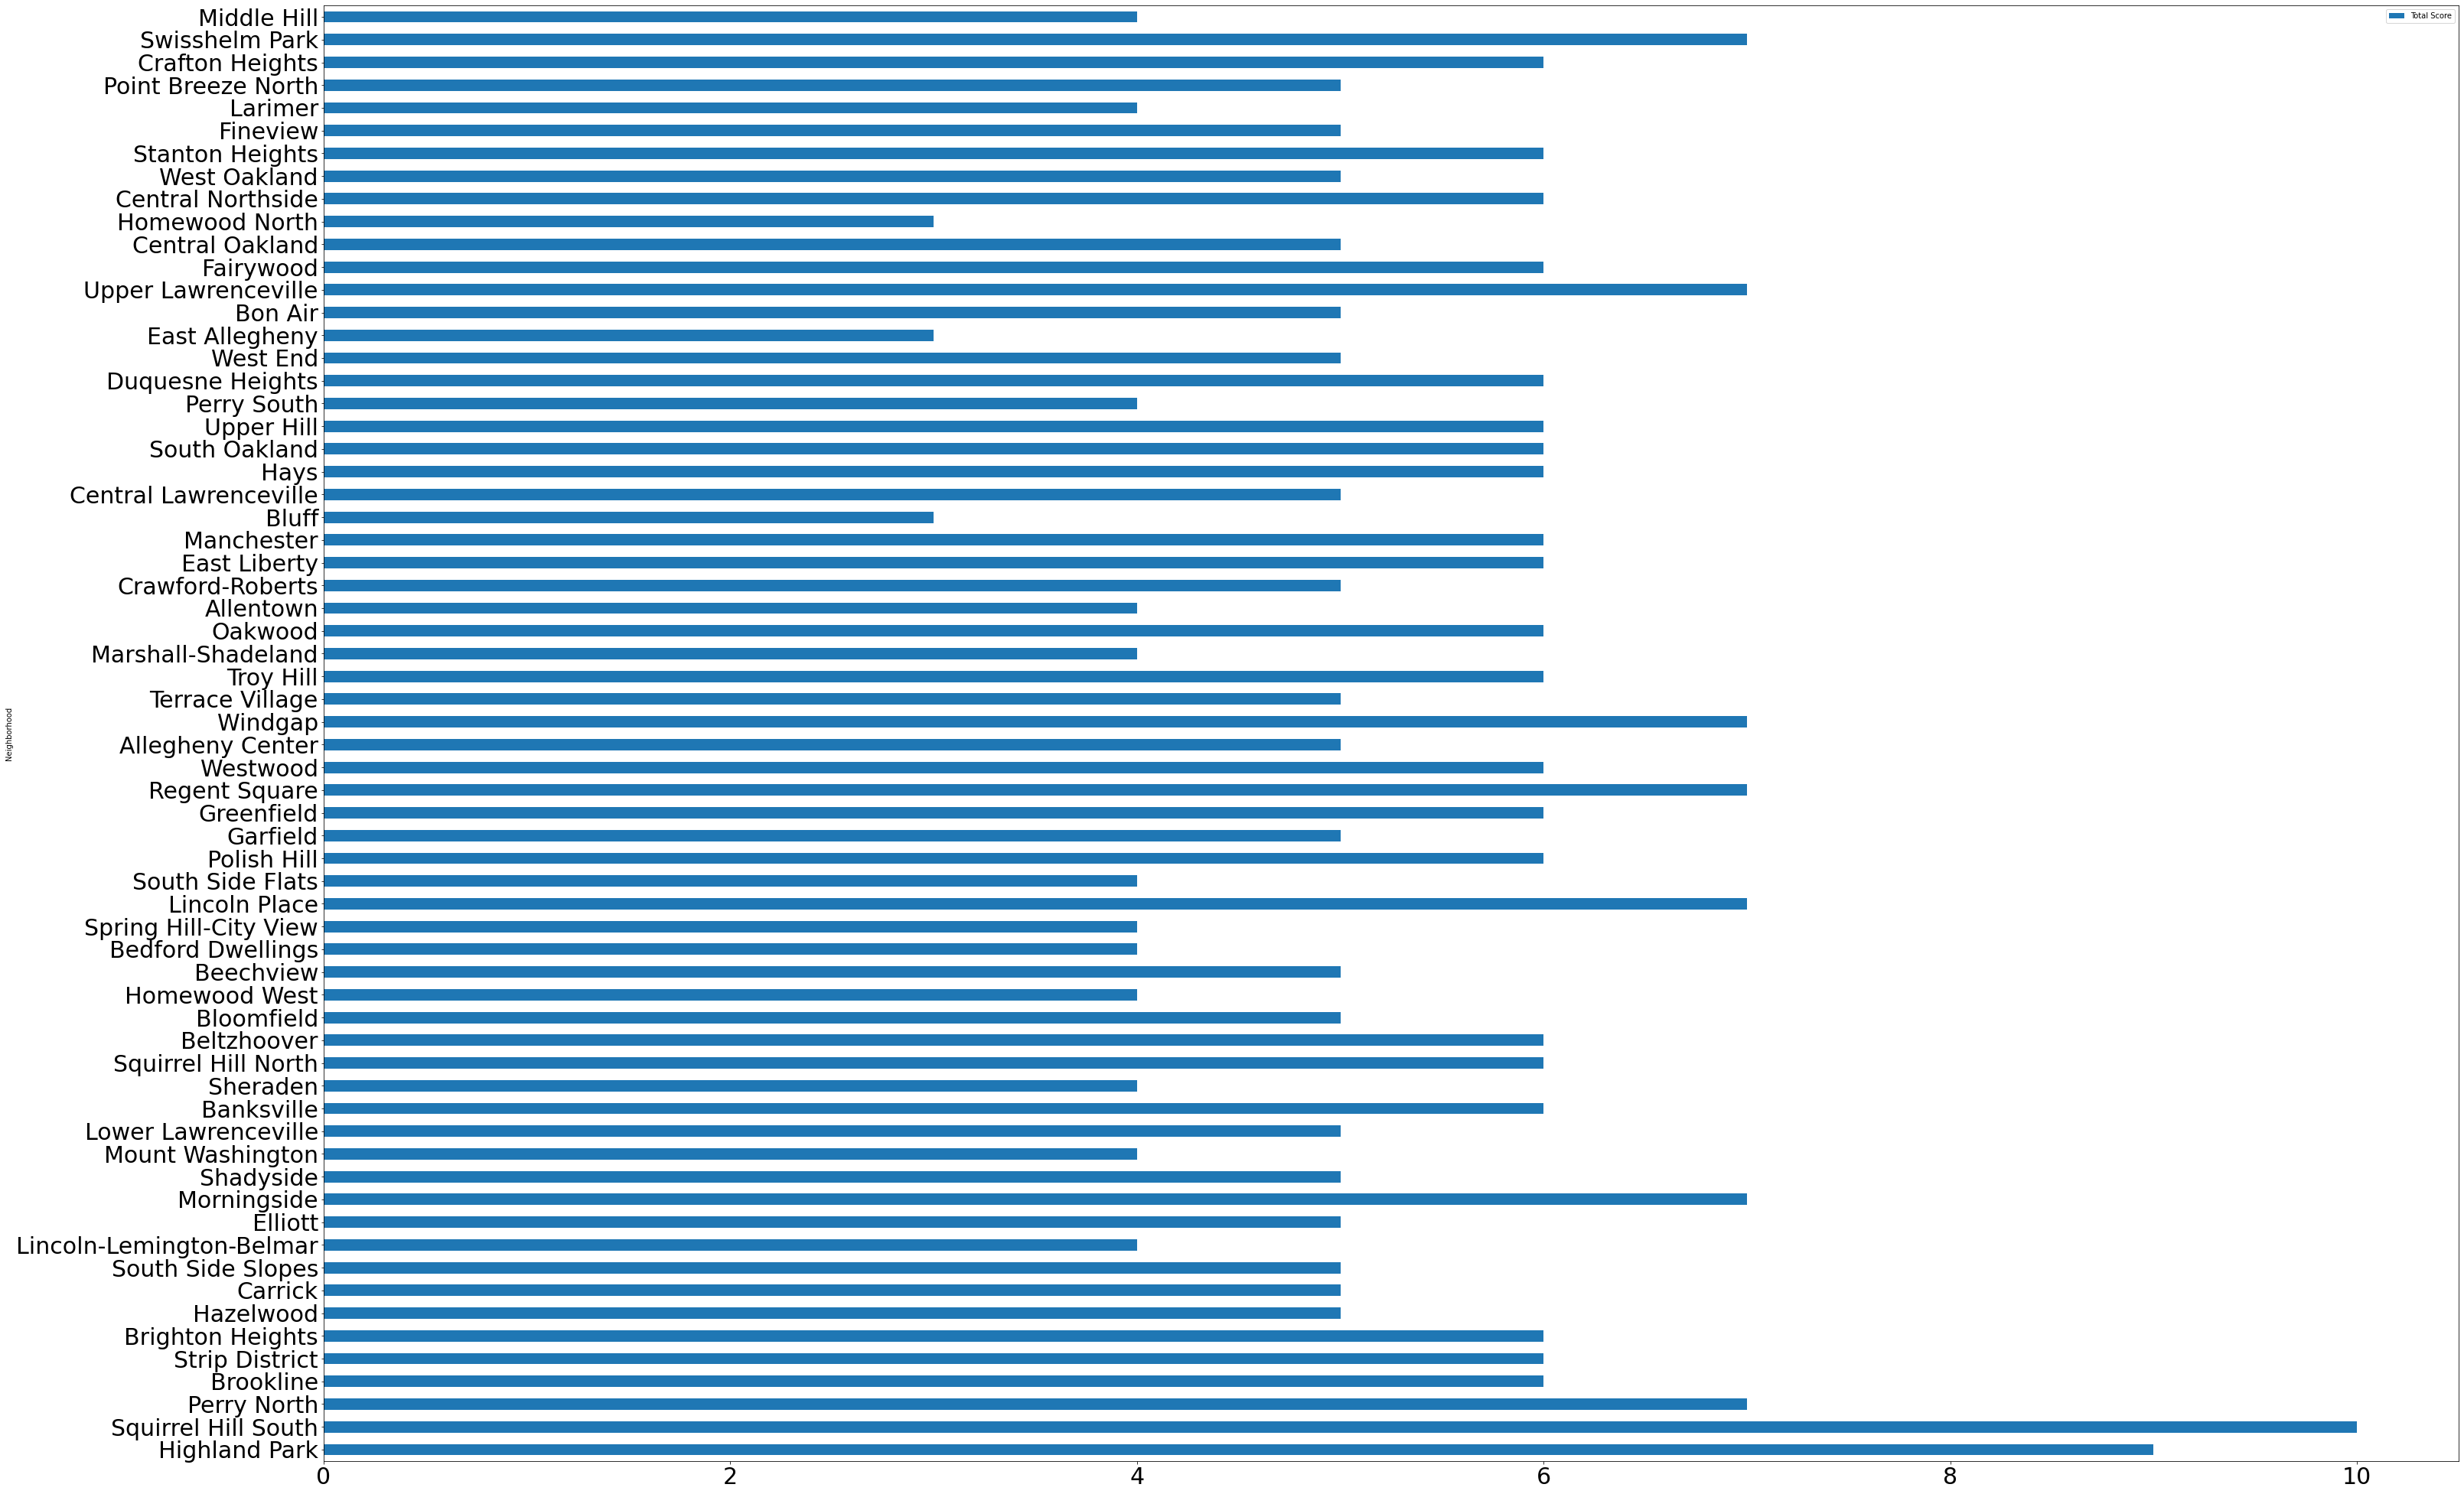

In [7]:
output3.plot.barh(y="Total Score",figsize=(50,35), fontsize=30)

### Arrests Score

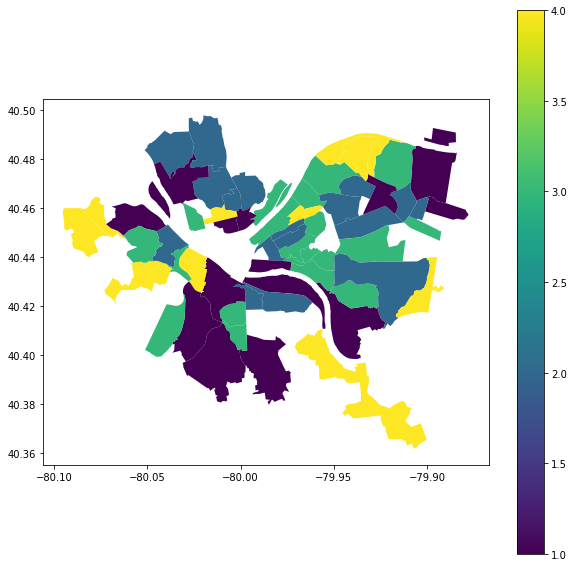

In [20]:
import geopandas
%matplotlib inline
# import dataset
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
#neighborhoods.plot() # plot the geopandas dataframe
#neighborhoods
points_map = neighborhoods.merge(output3, how='left', left_on='hood', right_on='Neighborhood')
points_map.plot(column='Arrests_Score', figsize=(10,10), legend=True)

### City Facilities

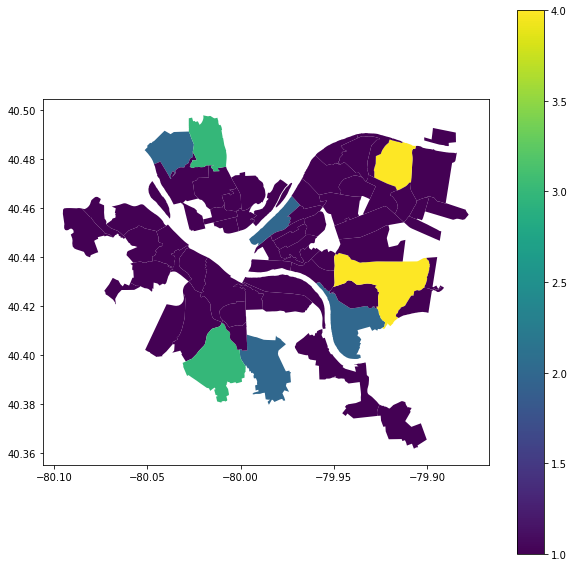

In [25]:
points_map.plot(column='Points', figsize=(10,10), legend=True)

### Playgrounds Score

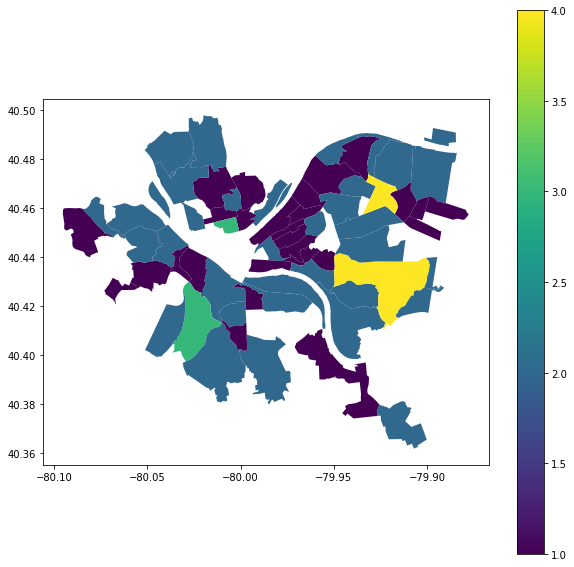

In [22]:
points_map.plot(column='score_playgrounds', figsize=(10,10), legend=True)

### Total Score

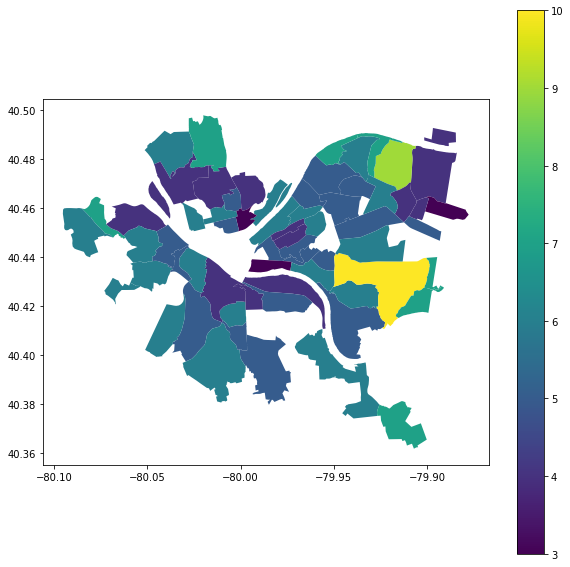

In [23]:
points_map.plot(column='Total Score', figsize=(10,10), legend=True)

### From this data-driven analysis, the best neighborhood in Pittsburgh, defined by family-friendlyness, is Squirrel Hill South. This neighborhood has the most playgrounds, least arrests, and most city facilities. Highland Park comes in at a close second.

# Conclusion

(Bekah) The data driven determination of "best neighborhood" is different from my favorite neighborhood. My favorite neighborhood is Shadyside. The reason they are different is because I chose my favorite neighborhood based on a metric that is different from family-friendlyness. I value different things, such as number of good restaurants, shops, and proximity to Oakland.

(Jeremy) Squirrel Hill South is an interesting conclusion for best neighborhood to me. I think a large factor in how SHS ranked first on our metric is that ot contains both Schenley Park and Frick Park. This gives the area a large number of playgrounds as well as city facilities, while also possibly explaining why their may be less arrests, since such a large portion is park areas

(Daniel) Squirrel Hill South had a average arrest score compared to other neighborhoods in Pittsburgh, but this isn't surprising becuse it is a very urban community and conatins a highly dense population. It makes sense that it would contain lots of playground equipment and other facilities for public use. It seemed my statistic did not take into account the arrest-population ratio so smaller neighborhoods often scored higher th